<a href="https://colab.research.google.com/github/Kritsana135/knn-classification-iris/blob/master/iris_k_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

พล็อตกราฟเพื่อดูการกระจายตัวของข้อมูล

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
x = range(50)

เริ่มที petal width

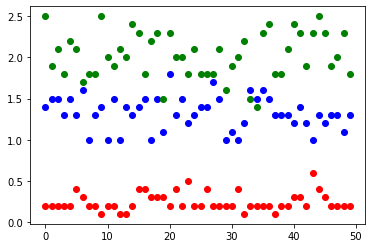

In [5]:
plt.scatter(x,iris.data[:50,3],color='red') #petal width of Setosa
plt.scatter(x,iris.data[50:100,3],color='blue') #petal width of Versicolour 
plt.scatter(x,iris.data[100:,3],color='green') #petal width of Virginica

ต่อด้วย petal length

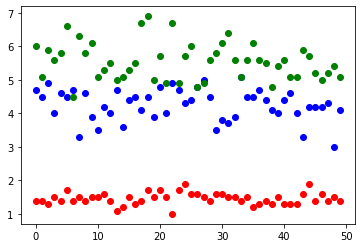

In [6]:
plt.scatter(x,iris.data[:50,2],color='red') #petal length of Setosa
plt.scatter(x,iris.data[50:100,2],color='blue') #petal length of Versicolour 
plt.scatter(x,iris.data[100:,2],color='green') #petal length of Virginica

แบ่งข้อมูลสำหรับ
- การเทรน 80%
- การทดสอบ 20%

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(iris.data[:,2:4],iris.target,test_size=0.2,random_state=42,stratify=iris.target)
print('Train Shape X: {} Y : {}'.format(X_train.shape,Y_train.shape))
print('Test Shape X: {} Y : {}'.format(X_test.shape,Y_test.shape))


Train Shape X: (120, 2) Y : (120,)
Test Shape X: (30, 2) Y : (30,)


สร้าง model K-NN ด้วยการเรียก Library KNeighborsClassifier

โดยกำหนดเพื่อนบ้านไว้ที่ 1 คน

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

เทรนโมเดลด้วยคำสั่ง fit(X,Y)
- ใช้ X_train,Y_train

In [9]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

ทำการทดสอบโมเดลด้วย X_test

In [11]:
answer = knn.predict(X_test)

ทำ Evaluate-Test

In [12]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



ทำการ Scale เพื่อเพิ่มความแม่นยำ

In [13]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(iris.data[:,2:4])

แบ่งข้อมูลอีกครั้ง

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.2, random_state=42,stratify=iris.target)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)#ฝึกโมเดล
#ทดสอบโมเดล
answer = knn.predict(X_test)
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



ทำการ Tune Model

In [18]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1,11)}
knn_best = GridSearchCV(knn, parameters, cv=5)
knn_best.fit(X_train,y_train)
knn_best.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

ทดสอบโมเดลอีกครั้ง

In [19]:
answer = knn_best.predict(X_test)
print(classification_report(y_test, answer))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

